<a href="https://colab.research.google.com/github/asddzxcc1856/2024-colab/blob/main/%E3%80%8C%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92%E5%B0%88%E9%A1%8C_%E5%BF%83%E8%87%9F%E7%97%85%E7%99%BC%E7%94%9F%E9%A0%90%E6%B8%AC%E8%B3%87%E6%96%99%E9%9B%8612345%E3%80%8D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kaggle 資料引入和下載

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'heart-attack-analysis-prediction-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1226038%2F2047221%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240517%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240517T114949Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D746cd123f752679b223a412731b3ff8a50daf6e39a3cef0124ce27743a365987d8f7847c41f9eec72cf726c4d75500aed42e08fb31bbea38ddb10a154e5cda6c56679c7f707f6c38e421b13f806a257fe77506c1c1d05d2002c6d22212e25221f76f07f3f76c825948a05340e909efcb32fda6799a751069cf1602bbb39f1269faf7e16aa0b647f9feeed6a488da097ef96d1353920d9e758f6ca645205b5d0bc3d765370d383204c3462de29ed7ab9b00f69eed6ee20d73fcea950633cd5e2f2a9d093af2abcd6414b2291cf7afeb2c047c0626f3bb5abc0be1bbeca5e60309baf93e1fe9f2a353ee5d8a81e39f7a4646b26af5d42af1926b46f43ef339dfef'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 4209 bytes downloaded
Downloaded and uncompressed: heart-attack-analysis-prediction-dataset
Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv
/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv


In [ ]:
df_heart_o2Saturation_dataset = pd.read_csv('/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv')
df_heart_attack_dataset = pd.read_csv('/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv')

In [ ]:
print(df_heart_o2Saturation_dataset.values[:,0].shape)

print(df_heart_attack_dataset.values[:,:-2].shape)

(3585,)
(303, 12)


In [ ]:
print(df_heart_o2Saturation_dataset.values[:,0])

print(df_heart_attack_dataset.values[:,:-2])
df_heart_attack_dataset.tail(10)

[98.6 98.6 98.6 ... 98.6 98.6 98.6]
[[63.   1.   3.  ...  2.3  0.   0. ]
 [37.   1.   2.  ...  3.5  0.   0. ]
 [41.   0.   1.  ...  1.4  2.   0. ]
 ...
 [68.   1.   0.  ...  3.4  1.   2. ]
 [57.   1.   0.  ...  1.2  1.   1. ]
 [57.   0.   1.  ...  0.   1.   1. ]]


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0
294,44,1,0,120,169,0,1,144,1,2.8,0,0,1,0
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


# Overfitting  1.0 v.s. 0.86

In [ ]:
df_heart_o2Saturation_dataset = pd.read_csv('/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv')
df_heart_attack_dataset = pd.read_csv('/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv')
x = df_heart_attack_dataset.values[:,:-2]
y = df_heart_attack_dataset.values[:,-1:]
print(x.shape)
print(y.shape)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
RFC = RandomForestClassifier(n_estimators=1000,criterion='gini')
RFC.fit(X_train,y_train.reshape(-1))
y_pred = RFC.predict(X_test)
accuracy_score(y_test, y_pred)
score_train = RFC.score(X_train, y_train)
score_test = RFC.score(X_test, y_test)
print(f"Train Accuracy: {score_train}")
print(f"Test Accuracy: {score_test}")

(303, 12)
(303, 1)
(227, 12)
(76, 12)
(227, 1)
(76, 1)
Train Accuracy: 1.0
Test Accuracy: 0.868421052631579


# 貝氏優化找出最好的RandomForestClassifier

In [ ]:
!pip install bayesian-optimization
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score
def objective(n_estimators, max_depth, min_samples_split, max_features):
    model = RandomForestClassifier(n_estimators=int(n_estimators),
                                   max_depth=int(max_depth),
                                   min_samples_split=int(min_samples_split),
                                   max_features=min(max_features, 0.999),  # Fraction, must be <= 1.0
                                   random_state=42)

    return cross_val_score(model, X_train, y_train.reshape(-1), cv=3, scoring="accuracy").mean()
param = {
    'n_estimators': (1, 500),
    'max_depth': (1, 50),
    'min_samples_split': (2, 25),
    'max_features': (0.1, 0.999),
}

optimizer = BayesianOptimization(f=objective, pbounds=param, random_state=42)
optimizer.maximize(init_points=5, n_iter=15)
best_params = optimizer.max['params']

best_params

|   iter    |  target   | max_depth | max_fe... | min_sa... | n_esti... |
-------------------------------------------------------------------------
| 1         | 0.7619    | 19.35     | 0.9547    | 18.84     | 299.7     |
| 2         | 0.8018    | 8.645     | 0.2402    | 3.336     | 433.2     |
| 3         | 0.7664    | 30.45     | 0.7366    | 2.473     | 485.0     |
| 4         | 0.7842    | 41.79     | 0.2909    | 6.182     | 92.52     |
| 5         | 0.7708    | 15.91     | 0.5718    | 11.93     | 146.3     |
| 6         | 0.7842    | 8.633     | 0.3423    | 4.297     | 432.7     |
| 7         | 0.8106    | 7.583     | 0.1053    | 2.683     | 433.9     |
| 8         | 0.8061    | 4.764     | 0.3486    | 3.559     | 435.0     |
| 9         | 0.7709    | 6.936     | 0.552     | 2.913     | 436.0     |
| 10        | 0.7709    | 3.797     | 0.6037    | 4.512     | 435.3     |
| 11        | 0.7753    | 9.041     | 0.5107    | 2.317     | 434.5     |
| 12        | 0.7754    | 10.42     | 

{'max_depth': 18.86294887190213,
 'max_features': 0.35776565103021174,
 'min_samples_split': 17.921578648300702,
 'n_estimators': 334.0016959181849}

# 使用貝氏找出最好的參數給RandomForestClassifier使用

In [ ]:
RFmodel_Bayes = RandomForestClassifier(n_estimators=int(best_params['n_estimators']),
                                      max_depth=int(best_params['max_depth']),
                                      min_samples_split=int(best_params['min_samples_split']),
                                      max_features=best_params['max_features'],
                                      random_state=42)

# RandomForestClassifier貝氏的結果

In [ ]:
RFmodel_Bayes.fit(X_train,y_train.reshape(-1))
y_pred = RFmodel_Bayes.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print("%.2f" % accuracy)

0.86


# index 0~334 中的第1個estimator

[Text(0.5740740740740741, 0.9375, 'exng <= 0.5\ngini = 0.5\nsamples = 144\nvalue = [110, 117]\nclass = no heart attack'),
 Text(0.3333333333333333, 0.8125, 'slp <= 1.5\ngini = 0.446\nsamples = 100\nvalue = [53, 105]\nclass = no heart attack'),
 Text(0.18518518518518517, 0.6875, 'caa <= 0.5\ngini = 0.494\nsamples = 43\nvalue = [35, 44]\nclass = no heart attack'),
 Text(0.1111111111111111, 0.5625, 'oldpeak <= 1.7\ngini = 0.32\nsamples = 26\nvalue = [9, 36]\nclass = no heart attack'),
 Text(0.07407407407407407, 0.4375, 'trtbps <= 111.0\ngini = 0.105\nsamples = 22\nvalue = [2, 34]\nclass = no heart attack'),
 Text(0.037037037037037035, 0.3125, 'gini = 0.444\nsamples = 4\nvalue = [2, 4]\nclass = no heart attack'),
 Text(0.1111111111111111, 0.3125, 'gini = 0.0\nsamples = 18\nvalue = [0, 30]\nclass = no heart attack'),
 Text(0.14814814814814814, 0.4375, 'gini = 0.346\nsamples = 4\nvalue = [7, 2]\nclass = heart attack'),
 Text(0.25925925925925924, 0.5625, 'oldpeak <= 0.5\ngini = 0.36\nsamples 

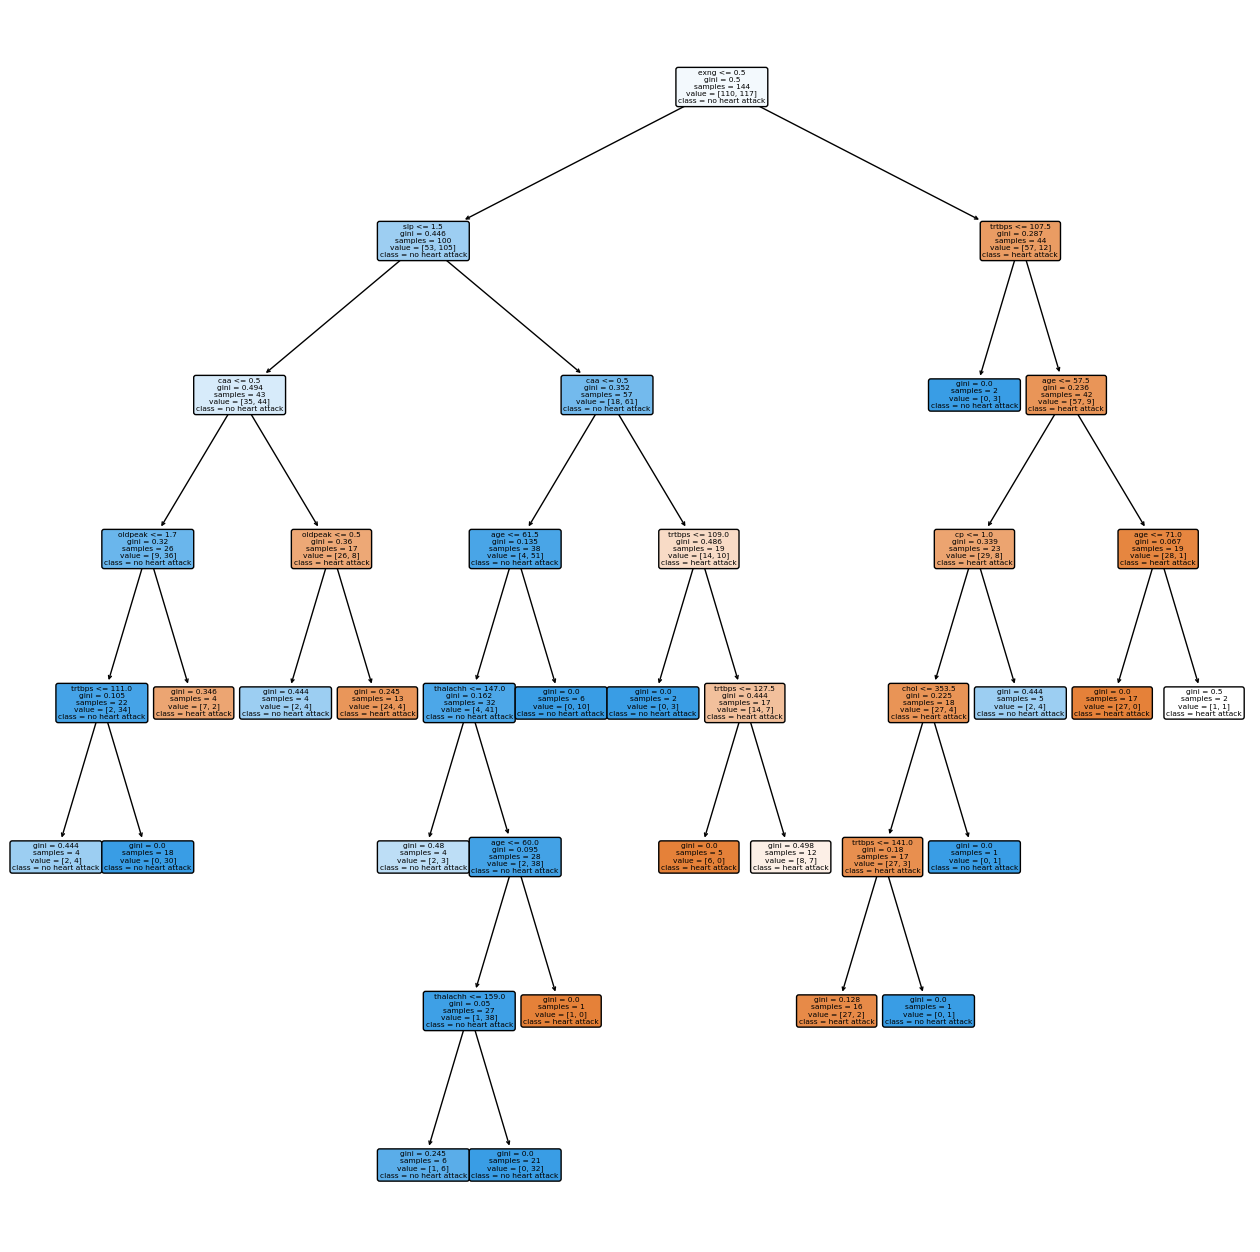

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (16,16))
tree.plot_tree(RFmodel_Bayes.estimators_[1],
                feature_names = list(df_heart_attack_dataset.columns[:-2]),
                class_names = ['heart attack','no heart attack'],
                rounded = True,
                filled = True)

# LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
to minimize the residual sum of squares between the observed targets in
the dataset, and the targets predicted by the linear approximation.

In [ ]:
df_heart_o2Saturation_dataset = pd.read_csv('/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv')
df_heart_attack_dataset = pd.read_csv('/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv')
x = df_heart_attack_dataset.values[:,:-2]
y = df_heart_attack_dataset.values[:,-1:]
print("feature dataset",x.shape)
print("target dataset",y.shape)

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)
print("training feature",X_train.shape)
print("test feature",X_test.shape)
print("training target",y_train.shape)
print("test target",y_test.shape)
clf = LinearRegression()
clf.fit(X_train,y_train.reshape(-1))
y_pred = clf.predict(X_test)
score = clf.score(X_train,y_train)
print("training set accuracy %.1f" % (score * 100),"%")
score = clf.score(X_test,y_test)
print("test set accuracy %.1f" % (score * 100),"%")
print("------Weight w0 to w12------")
print("w0",clf.intercept_)
for key,value in enumerate(clf.coef_):
  print("w" + str(key + 1),value)
print("----------------------------")

feature dataset (303, 12)
target dataset (303, 1)
training feature (227, 12)
test feature (76, 12)
training target (227, 1)
test target (76, 1)
training set accuracy 48.9 %
test set accuracy 50.6 %
------Weight w0 to w12------
w0 0.6069165276725237
w1 -0.00014928947086210887
w2 -0.20348702112433503
w3 0.12037246839238477
w4 -0.00166401615125511
w5 -0.0003194214961372843
w6 0.018822315321887124
w7 0.06329067688833644
w8 0.0018456865761108388
w9 -0.18972211381165757
w10 -0.06587219420257162
w11 0.10666114963561266
w12 -0.11594998436979835
----------------------------


# Lasso (1 / (2 * n_samples)) * ||y - Xw||^2_2 + alpha * ||w||_1

In [ ]:
df_heart_o2Saturation_dataset = pd.read_csv('/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv')
df_heart_attack_dataset = pd.read_csv('/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv')
x = df_heart_attack_dataset.values[:,:-2]
y = df_heart_attack_dataset.values[:,-1:]
print("feature dataset",x.shape)
print("target dataset",y.shape)

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Lasso
from sklearn.metrics import accuracy_score
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)
print("training feature",X_train.shape)
print("test feature",X_test.shape)
print("training target",y_train.shape)
print("test target",y_test.shape)
clf = Lasso(alpha=0.008)
clf.fit(X_train,y_train.reshape(-1))
y_pred = clf.predict(X_test)
score = clf.score(X_train,y_train)
print("training set accuracy %.1f" % (score * 100),"%")
score = clf.score(X_test,y_test)
print("test set accuracy %.1f" % (score * 100),"%")
print("------Weight w0 to w12------")
print("w0",clf.intercept_)
for key,value in enumerate(clf.coef_):
  print("w" + str(key + 1),value)
print("----------------------------")

feature dataset (303, 12)
target dataset (303, 1)
training feature (227, 12)
test feature (76, 12)
training target (227, 1)
test target (76, 1)
training set accuracy 48.5 %
test set accuracy 51.9 %
------Weight w0 to w12------
w0 0.5446456480365213
w1 -0.00021120438064603218
w2 -0.17623151566004527
w3 0.11882139373950389
w4 -0.0015740049814537648
w5 -0.0003018153554176623
w6 0.0
w7 0.03786295518588919
w8 0.0023315265076599622
w9 -0.15606528438645176
w10 -0.07141184128204381
w11 0.08291736715103623
w12 -0.1082977450923375
----------------------------


# Linear least squares with L2 regularization.

Minimizes the objective function:

# ||y - Xw||^2_2 + alpha * ||w||^2_2
This model solves a regression model where the loss function is
the linear least squares function and regularization is given by
the l2-norm. Also known as Ridge Regression or Tikhonov regularization.
This estimator has built-in support for multi-variate regression

In [ ]:
df_heart_o2Saturation_dataset = pd.read_csv('/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv')
df_heart_attack_dataset = pd.read_csv('/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv')
x = df_heart_attack_dataset.values[:,:-2]
y = df_heart_attack_dataset.values[:,-1:]
print("feature dataset",x.shape)
print("target dataset",y.shape)

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Ridge
from sklearn.metrics import accuracy_score
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)
print("training feature",X_train.shape)
print("test feature",X_test.shape)
print("training target",y_train.shape)
print("test target",y_test.shape)
clf = Ridge(alpha=0.1)
clf.fit(X_train,y_train.reshape(-1))
y_pred = clf.predict(X_test)
score = clf.score(X_train,y_train)
print("training set accuracy %.1f" % (score * 100),"%")
score = clf.score(X_test,y_test)
print("test set accuracy %.1f" % (score * 100),"%")
print("------Weight w0 to w12------")
print("w0",clf.intercept_)
for key,value in enumerate(clf.coef_):
  print("w" + str(key + 1),value)
print("----------------------------")

feature dataset (303, 12)
target dataset (303, 1)
training feature (227, 12)
test feature (76, 12)
training target (227, 1)
test target (76, 1)
training set accuracy 48.9 %
test set accuracy 50.6 %
------Weight w0 to w12------
w0 0.6059659054423984
w1 -0.00014828985837399028
w2 -0.20312107534672105
w3 0.12038716120402537
w4 -0.0016630580560737498
w5 -0.0003187682232581916
w6 0.01867308747514697
w7 0.06323686493932744
w8 0.0018494835307549964
w9 -0.1893222250448128
w10 -0.0659653611539624
w11 0.10649797619338149
w12 -0.11590311004322741
----------------------------


# 無正規化，標準化 LogisticRegression

feature dataset (303, 12)
target dataset (303, 1)
training feature (227, 12)
test feature (76, 12)
training target (227, 1)
test target (76, 1)
training set accuracy 84.6 %
test set accuracy 85.5 %


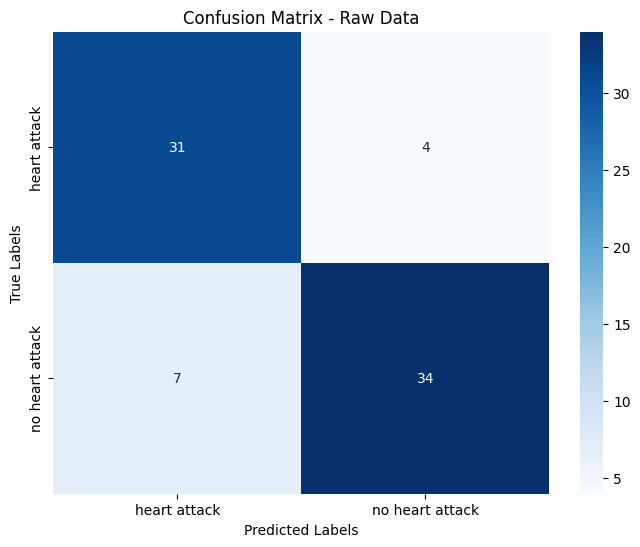

In [ ]:

df_heart_o2Saturation_dataset = pd.read_csv('/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv')
df_heart_attack_dataset = pd.read_csv('/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv')
x = df_heart_attack_dataset.values[:,:-2]
y = df_heart_attack_dataset.values[:,-1:]
print("feature dataset",x.shape)
print("target dataset",y.shape)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)
print("training feature",X_train.shape)
print("test feature",X_test.shape)
print("training target",y_train.shape)
print("test target",y_test.shape)
# Logical Regression model
model_raw = LogisticRegression(max_iter=10000)
model_raw.fit(X_train, y_train.ravel())
y_pred_raw = model_raw.predict(X_test)

accuracy_raw = accuracy_score(y_test, y_pred_raw)
cm_raw = confusion_matrix(y_test, y_pred_raw)

# 正規化
#scaler_minmax = MinMaxScaler()

#X_train_minmax = scaler_minmax.fit_transform(X_train)
#X_test_minmax = scaler_minmax.transform(X_test)

# 準確率
score = model_raw.score(X_train,y_train)
print("training set accuracy %.1f" % (score * 100),"%")
score = model_raw.score(X_test,y_test)
print("test set accuracy %.1f" % (score * 100),"%")
#print(f"Accuracy with normalized data (Min-Max): {accuracy_minmax:.2f}")
#print(f"Accuracy with standardized data (Z-Score): {accuracy_standard:.2f}")

plt.figure(figsize=(8, 6))
sns.heatmap(cm_raw, annot=True, fmt="d", cmap="Blues", xticklabels=['heart attack','no heart attack'], yticklabels=['heart attack','no heart attack'])
plt.title('Confusion Matrix - Raw Data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# 資料正規化 scaler_minmax = MinMaxScaler()

training feature (227, 12)
test feature (76, 12)
training target (227, 1)
test target (76, 1)
training set accuracy with normalized data (Min-Max) 81.9 %
test set accuracy with normalized data (Min-Max) 84.2 %


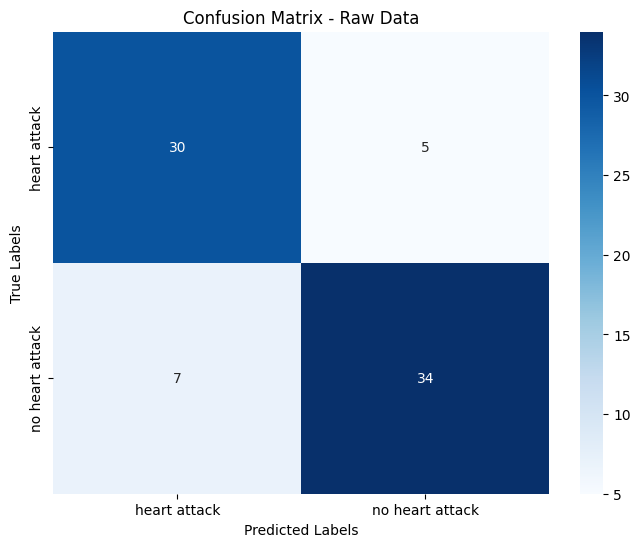

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)
print("training feature",X_train.shape)
print("test feature",X_test.shape)
print("training target",y_train.shape)
print("test target",y_test.shape)
# 正規化
scaler_minmax = MinMaxScaler()

X_train_minmax = scaler_minmax.fit_transform(X_train)
X_test_minmax = scaler_minmax.transform(X_test)
# Logical Regression model

model_raw = LogisticRegression(max_iter=10000)
model_raw.fit(X_train_minmax, y_train.ravel())
y_pred_raw = model_raw.predict(X_test_minmax)

accuracy_raw = accuracy_score(y_test, y_pred_raw)
cm_raw = confusion_matrix(y_test, y_pred_raw)


# 準確率
score = model_raw.score(X_train_minmax,y_train)
print("training set accuracy with normalized data (Min-Max) %.1f" % (score * 100),"%")
score = model_raw.score(X_test_minmax,y_test)
print("test set accuracy with normalized data (Min-Max) %.1f" % (score * 100),"%")
#print(f"Accuracy with normalized data (Min-Max): {accuracy_minmax:.2f}")
#print(f"Accuracy with standardized data (Z-Score): {accuracy_standard:.2f}")

plt.figure(figsize=(8, 6))
sns.heatmap(cm_raw, annot=True, fmt="d", cmap="Blues", xticklabels=['heart attack','no heart attack'], yticklabels=['heart attack','no heart attack'])
plt.title('Confusion Matrix - Raw Data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# 資料標準化 scaler_SS = StandardScaler()

training feature (227, 12)
test feature (76, 12)
training target (227, 1)
test target (76, 1)
training set accuracy standardized data (Z-Score) 82.8 %
test set accuracy standardized data (Z-Score) 85.5 %


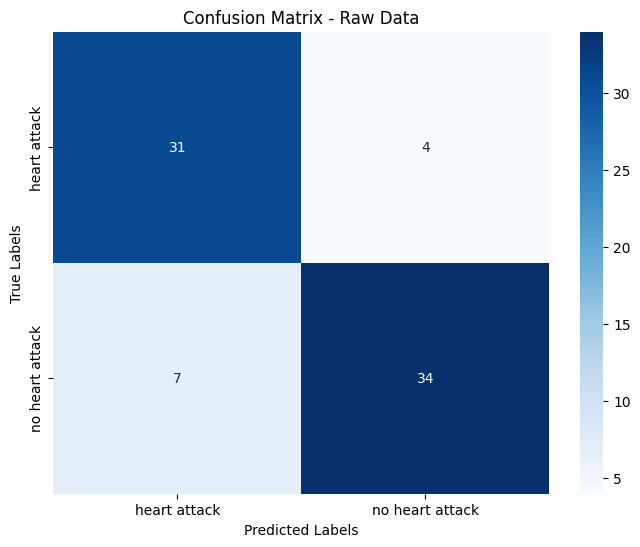

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)
print("training feature",X_train.shape)
print("test feature",X_test.shape)
print("training target",y_train.shape)
print("test target",y_test.shape)
# 正規化
scaler_SS = StandardScaler()

X_train_SS = scaler_SS.fit_transform(X_train)
X_test_SS = scaler_SS.transform(X_test)
# Logical Regression model

model_raw = LogisticRegression(max_iter=10000)
model_raw.fit(X_train_SS, y_train.ravel())
y_pred_raw = model_raw.predict(X_test_SS)

accuracy_raw = accuracy_score(y_test, y_pred_raw)
cm_raw = confusion_matrix(y_test, y_pred_raw)


# 準確率
score = model_raw.score(X_train_SS,y_train)
print("training set accuracy standardized data (Z-Score) %.1f" % (score * 100),"%")
score = model_raw.score(X_test_SS,y_test)
print("test set accuracy standardized data (Z-Score) %.1f" % (score * 100),"%")
#print(f"Accuracy with normalized data (Min-Max): {accuracy_minmax:.2f}")
#print(f"Accuracy with standardized data (Z-Score): {accuracy_standard:.2f}")

plt.figure(figsize=(8, 6))
sns.heatmap(cm_raw, annot=True, fmt="d", cmap="Blues", xticklabels=['heart attack','no heart attack'], yticklabels=['heart attack','no heart attack'])
plt.title('Confusion Matrix - Raw Data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# SVM

feature dataset (303, 12)
target dataset (303, 1)
training feature (227, 12)
test feature (76, 12)
training target (227, 1)
test target (76, 1)
training set accuracy 83.7 %
test set accuracy 88.2 %


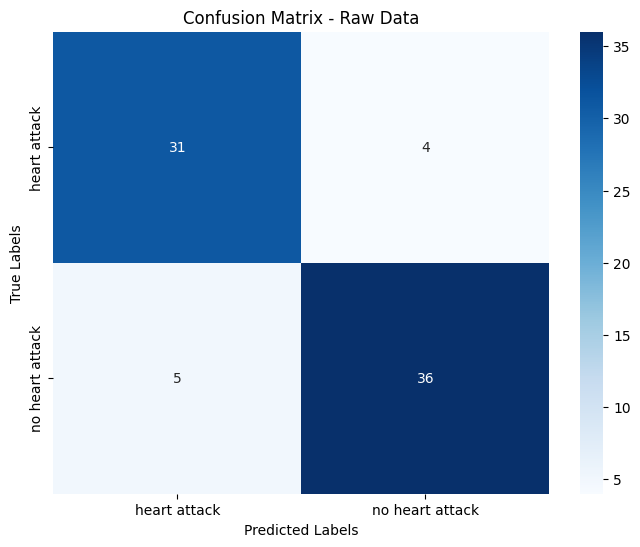

In [ ]:
df_heart_o2Saturation_dataset = pd.read_csv('/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv')
df_heart_attack_dataset = pd.read_csv('/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv')
x = df_heart_attack_dataset.values[:,:-2]
y = df_heart_attack_dataset.values[:,-1:]
print("feature dataset",x.shape)
print("target dataset",y.shape)

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)
print("training feature",X_train.shape)
print("test feature",X_test.shape)
print("training target",y_train.shape)
print("test target",y_test.shape)
# Logical Regression model
model_raw = SVC(kernel='linear', C=1.0)
model_raw.fit(X_train, y_train.ravel())
y_pred_raw = model_raw.predict(X_test)

accuracy_raw = accuracy_score(y_test, y_pred_raw)
cm_raw = confusion_matrix(y_test, y_pred_raw)

# 正規化
#scaler_minmax = MinMaxScaler()

#X_train_minmax = scaler_minmax.fit_transform(X_train)
#X_test_minmax = scaler_minmax.transform(X_test)

# 準確率
score = model_raw.score(X_train,y_train)
print("training set accuracy %.1f" % (score * 100),"%")
score = model_raw.score(X_test,y_test)
print("test set accuracy %.1f" % (score * 100),"%")
#print(f"Accuracy with normalized data (Min-Max): {accuracy_minmax:.2f}")
#print(f"Accuracy with standardized data (Z-Score): {accuracy_standard:.2f}")

plt.figure(figsize=(8, 6))
sns.heatmap(cm_raw, annot=True, fmt="d", cmap="Blues", xticklabels=['heart attack','no heart attack'], yticklabels=['heart attack','no heart attack'])
plt.title('Confusion Matrix - Raw Data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# RBF SVM

feature dataset (303, 12)
target dataset (303, 1)
training feature (227, 12)
test feature (76, 12)
training target (227, 1)
test target (76, 1)
training set accuracy 65.6 %
test set accuracy 69.7 %


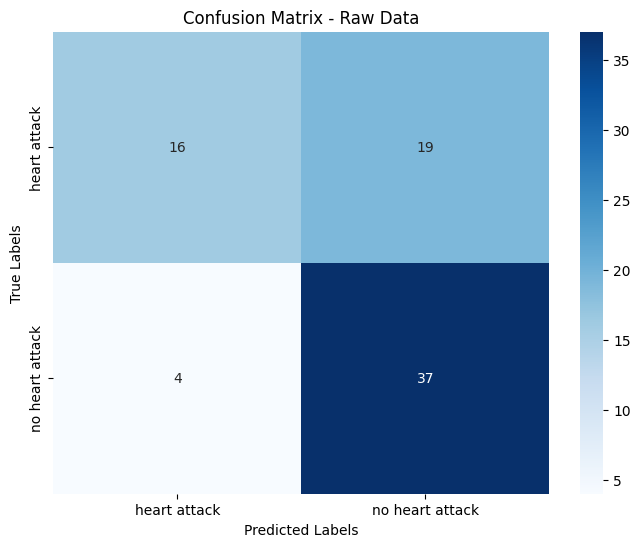

In [ ]:
df_heart_o2Saturation_dataset = pd.read_csv('/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv')
df_heart_attack_dataset = pd.read_csv('/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv')
x = df_heart_attack_dataset.values[:,:-2]
y = df_heart_attack_dataset.values[:,-1:]
print("feature dataset",x.shape)
print("target dataset",y.shape)

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)
print("training feature",X_train.shape)
print("test feature",X_test.shape)
print("training target",y_train.shape)
print("test target",y_test.shape)
# Logical Regression model
model_raw = SVC(kernel='rbf')
model_raw.fit(X_train, y_train.ravel())
y_pred_raw = model_raw.predict(X_test)

accuracy_raw = accuracy_score(y_test, y_pred_raw)
cm_raw = confusion_matrix(y_test, y_pred_raw)

# 正規化
#scaler_minmax = MinMaxScaler()

#X_train_minmax = scaler_minmax.fit_transform(X_train)
#X_test_minmax = scaler_minmax.transform(X_test)

# 準確率
score = model_raw.score(X_train,y_train)
print("training set accuracy %.1f" % (score * 100),"%")
score = model_raw.score(X_test,y_test)
print("test set accuracy %.1f" % (score * 100),"%")
#print(f"Accuracy with normalized data (Min-Max): {accuracy_minmax:.2f}")
#print(f"Accuracy with standardized data (Z-Score): {accuracy_standard:.2f}")

plt.figure(figsize=(8, 6))
sns.heatmap(cm_raw, annot=True, fmt="d", cmap="Blues", xticklabels=['heart attack','no heart attack'], yticklabels=['heart attack','no heart attack'])
plt.title('Confusion Matrix - Raw Data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# GridSearch SVM parameters

feature dataset (303, 12)
target dataset (303, 1)
training feature (227, 12)
test feature (76, 12)
training target (227, 1)
test target (76, 1)
Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END C=0.001, gamma=0.01, kernel=linear;, score=0.696 total time=   0.0s
[CV 2/5] END C=0.001, gamma=0.01, kernel=linear;, score=0.717 total time=   0.0s
[CV 3/5] END C=0.001, gamma=0.01, kernel=linear;, score=0.556 total time=   0.0s
[CV 4/5] END C=0.001, gamma=0.01, kernel=linear;, score=0.622 total time=   0.0s
[CV 5/5] END C=0.001, gamma=0.01, kernel=linear;, score=0.689 total time=   0.0s
[CV 1/5] END ...C=0.001, gamma=0.01, kernel=rbf;, score=0.543 total time=   0.0s
[CV 2/5] END ...C=0.001, gamma=0.01, kernel=rbf;, score=0.543 total time=   0.0s
[CV 3/5] END ...C=0.001, gamma=0.01, kernel=rbf;, score=0.533 total time=   0.0s
[CV 4/5] END ...C=0.001, gamma=0.01, kernel=rbf;, score=0.556 total time=   0.0s
[CV 5/5] END ...C=0.001, gamma=0.01, kernel=rbf;, score=0.556 tot

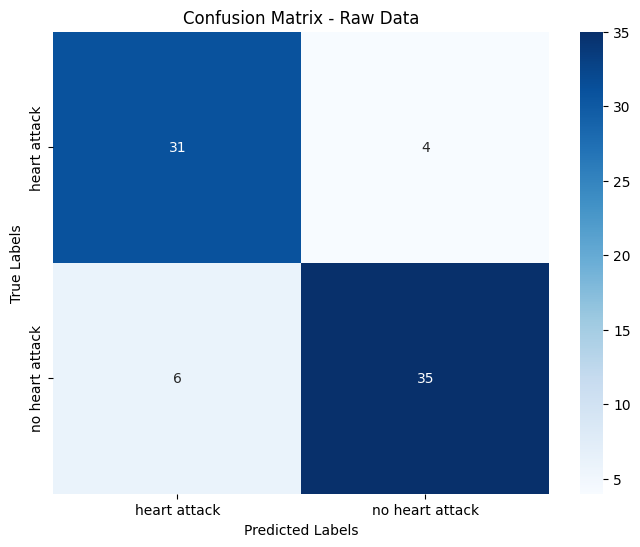

({'C': 100, 'gamma': 0.01, 'kernel': 'linear'}, 0.8057971014492754)


In [ ]:
df_heart_o2Saturation_dataset = pd.read_csv('/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv')
df_heart_attack_dataset = pd.read_csv('/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv')
x = df_heart_attack_dataset.values[:,:-2]
y = df_heart_attack_dataset.values[:,-1:]
print("feature dataset",x.shape)
print("target dataset",y.shape)

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)
print("training feature",X_train.shape)
print("test feature",X_test.shape)
print("training target",y_train.shape)
print("test target",y_test.shape)

model = SVC()

# 網格搜尋
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'gamma': [0.01, 0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, verbose=3, scoring='accuracy')
grid_search.fit(X_train, y_train.ravel())
y_pred_raw = grid_search.predict(X_test)

accuracy_raw = accuracy_score(y_test, y_pred_raw)
cm_raw = confusion_matrix(y_test, y_pred_raw)

# 正規化
#scaler_minmax = MinMaxScaler()

#X_train_minmax = scaler_minmax.fit_transform(X_train)
#X_test_minmax = scaler_minmax.transform(X_test)

# 準確率
score = grid_search.score(X_train,y_train)
print("training set accuracy %.1f" % (score * 100),"%")
score = grid_search.score(X_test,y_test)
print("test set accuracy %.1f" % (score * 100),"%")
#print(f"Accuracy with normalized data (Min-Max): {accuracy_minmax:.2f}")
#print(f"Accuracy with standardized data (Z-Score): {accuracy_standard:.2f}")

plt.figure(figsize=(8, 6))
sns.heatmap(cm_raw, annot=True, fmt="d", cmap="Blues", xticklabels=['heart attack','no heart attack'], yticklabels=['heart attack','no heart attack'])
plt.title('Confusion Matrix - Raw Data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

best_parameters = grid_search.best_params_
best_score = grid_search.best_score_

print((best_parameters, best_score))


# AdaBoostClassifier

feature dataset (303, 12)
target dataset (303, 1)
training feature (227, 12)
test feature (76, 12)
training target (227, 1)
test target (76, 1)
Fitting 5 folds for each of 240 candidates, totalling 1200 fits
[CV 1/5] END estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.0001, n_estimators=2, random_state=42;, score=0.674 total time=   0.0s
[CV 2/5] END estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.0001, n_estimators=2, random_state=42;, score=0.674 total time=   0.0s
[CV 3/5] END estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.0001, n_estimators=2, random_state=42;, score=0.667 total time=   0.0s
[CV 4/5] END estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.0001, n_estimators=2, random_state=42;, score=0.822 total time=   0.0s
[CV 5/5] END estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.0001, n_estimators=2, random_state=42;, score=0.711 total time=   0.0s
[CV 1/5] END estimator=DecisionTreeClassifier(max_depth=1

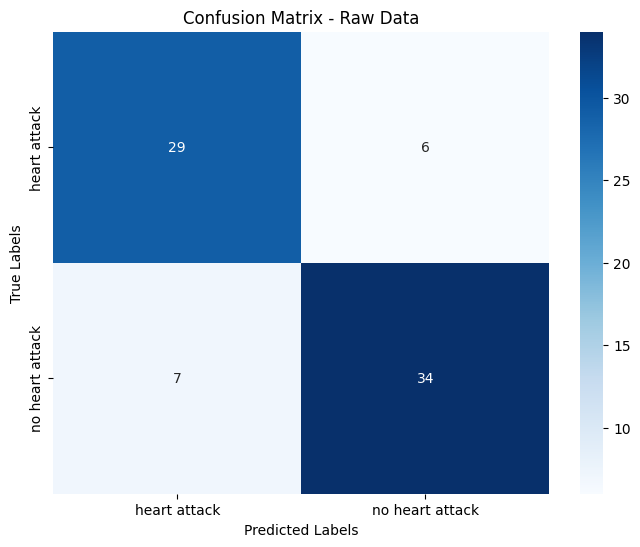

({'estimator': DecisionTreeClassifier(max_depth=1), 'learning_rate': 0.1, 'n_estimators': 32, 'random_state': 42}, 0.8282125603864735)


In [ ]:
df_heart_o2Saturation_dataset = pd.read_csv('/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv')
df_heart_attack_dataset = pd.read_csv('/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv')
x = df_heart_attack_dataset.values[:,:-2]
y = df_heart_attack_dataset.values[:,-1:]
print("feature dataset",x.shape)
print("target dataset",y.shape)

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import AdaBoostClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)
print("training feature",X_train.shape)
print("test feature",X_test.shape)
print("training target",y_train.shape)
print("test target",y_test.shape)

ada_dt = AdaBoostClassifier()

param_grid = {
    'estimator': [DecisionTreeClassifier(max_depth=1)],
    'n_estimators': range(2,50),
    'learning_rate': [0.0001,0.001,0.01,0.1,1],
    'random_state': [42],
}

grid_search = GridSearchCV(estimator=ada_dt, param_grid=param_grid, cv=5, verbose=3, scoring='accuracy')
grid_search.fit(X_train, y_train.ravel())
y_pred_raw = grid_search.predict(X_test)

accuracy_raw = accuracy_score(y_test, y_pred_raw)
cm_raw = confusion_matrix(y_test, y_pred_raw)

# 正規化
#scaler_minmax = MinMaxScaler()

#X_train_minmax = scaler_minmax.fit_transform(X_train)
#X_test_minmax = scaler_minmax.transform(X_test)

# 準確率
score = grid_search.score(X_train,y_train)
print("training set accuracy %.1f" % (score * 100),"%")
score = grid_search.score(X_test,y_test)
print("test set accuracy %.1f" % (score * 100),"%")
#print(f"Accuracy with normalized data (Min-Max): {accuracy_minmax:.2f}")
#print(f"Accuracy with standardized data (Z-Score): {accuracy_standard:.2f}")

plt.figure(figsize=(8, 6))
sns.heatmap(cm_raw, annot=True, fmt="d", cmap="Blues", xticklabels=['heart attack','no heart attack'], yticklabels=['heart attack','no heart attack'])
plt.title('Confusion Matrix - Raw Data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

best_parameters = grid_search.best_params_
best_score = grid_search.best_score_

print((best_parameters, best_score))

# VotingClassifier

feature dataset (303, 12)
target dataset (303, 1)
training feature (227, 12)
test feature (76, 12)
training target (227, 1)
test target (76, 1)
training set accuracy 91.2 %
test set accuracy 86.8 %


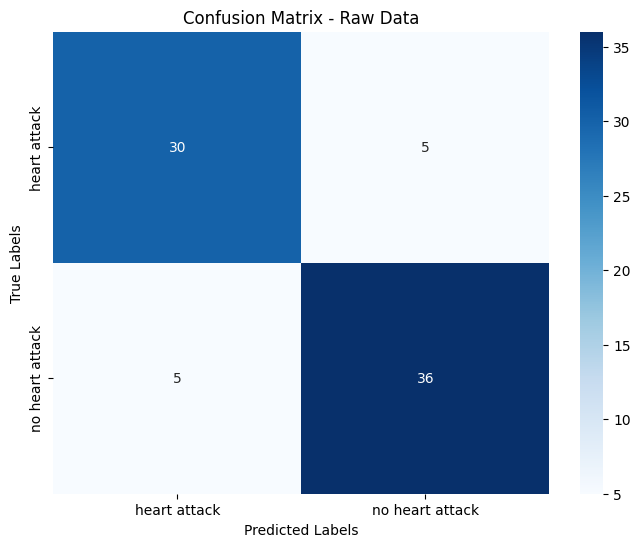

In [ ]:
df_heart_o2Saturation_dataset = pd.read_csv('/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv')
df_heart_attack_dataset = pd.read_csv('/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv')
x = df_heart_attack_dataset.values[:,:-2]
y = df_heart_attack_dataset.values[:,-1:]
print("feature dataset",x.shape)
print("target dataset",y.shape)

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import VotingClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)
print("training feature",X_train.shape)
print("test feature",X_test.shape)
print("training target",y_train.shape)
print("test target",y_test.shape)

ensemble = VotingClassifier(
    estimators=[
        ('svm', SVC(probability=True, kernel='linear')),
        ('dt', DecisionTreeClassifier()),
        ('lr', make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000)))
    ],
    voting='soft',
    weights=[2, 1, 1]  # 模型銓重設定
)

ensemble.fit(X_train, y_train.ravel())
y_pred_raw = ensemble.predict(X_test)

accuracy_raw = accuracy_score(y_test, y_pred_raw)
cm_raw = confusion_matrix(y_test, y_pred_raw)

# 正規化
#scaler_minmax = MinMaxScaler()

#X_train_minmax = scaler_minmax.fit_transform(X_train)
#X_test_minmax = scaler_minmax.transform(X_test)

# 準確率
score = ensemble.score(X_train,y_train)
print("training set accuracy %.1f" % (score * 100),"%")
score = ensemble.score(X_test,y_test)
print("test set accuracy %.1f" % (score * 100),"%")
#print(f"Accuracy with normalized data (Min-Max): {accuracy_minmax:.2f}")
#print(f"Accuracy with standardized data (Z-Score): {accuracy_standard:.2f}")

plt.figure(figsize=(8, 6))
sns.heatmap(cm_raw, annot=True, fmt="d", cmap="Blues", xticklabels=['heart attack','no heart attack'], yticklabels=['heart attack','no heart attack'])
plt.title('Confusion Matrix - Raw Data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# StakingClassifier

feature dataset (303, 12)
target dataset (303, 1)
training feature (227, 12)
test feature (76, 12)
training target (227, 1)
test target (76, 1)
training set accuracy 91.2 %
test set accuracy 82.9 %


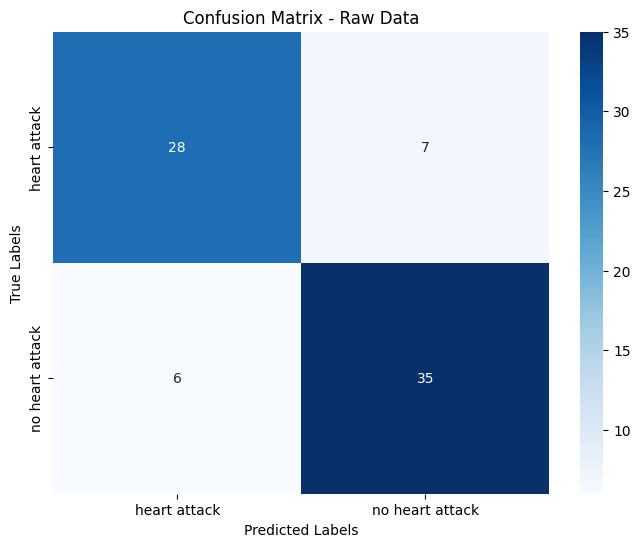

In [ ]:
df_heart_o2Saturation_dataset = pd.read_csv('/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv')
df_heart_attack_dataset = pd.read_csv('/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv')
x = df_heart_attack_dataset.values[:,:-2]
y = df_heart_attack_dataset.values[:,-1:]
print("feature dataset",x.shape)
print("target dataset",y.shape)

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import StackingClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)
print("training feature",X_train.shape)
print("test feature",X_test.shape)
print("training target",y_train.shape)
print("test target",y_test.shape)

estimators = [
    ('svm', make_pipeline(StandardScaler(), SVC(probability=True, kernel='linear'))),
    ('dt', DecisionTreeClassifier()),
    ('lr', make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000)))
]

# Stacking模型
stacking_ensemble = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(),
    cv=5,
    stack_method='auto',
    passthrough=False
)

ensemble.fit(X_train, y_train.ravel())
y_pred_raw = ensemble.predict(X_test)

accuracy_raw = accuracy_score(y_test, y_pred_raw)
cm_raw = confusion_matrix(y_test, y_pred_raw)

# 正規化
#scaler_minmax = MinMaxScaler()

#X_train_minmax = scaler_minmax.fit_transform(X_train)
#X_test_minmax = scaler_minmax.transform(X_test)

# 準確率
score = ensemble.score(X_train,y_train)
print("training set accuracy %.1f" % (score * 100),"%")
score = ensemble.score(X_test,y_test)
print("test set accuracy %.1f" % (score * 100),"%")
#print(f"Accuracy with normalized data (Min-Max): {accuracy_minmax:.2f}")
#print(f"Accuracy with standardized data (Z-Score): {accuracy_standard:.2f}")

plt.figure(figsize=(8, 6))
sns.heatmap(cm_raw, annot=True, fmt="d", cmap="Blues", xticklabels=['heart attack','no heart attack'], yticklabels=['heart attack','no heart attack'])
plt.title('Confusion Matrix - Raw Data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# VotingClassifier with GridSearch

feature dataset (303, 12)
target dataset (303, 1)
training feature (227, 12)
test feature (76, 12)
training target (227, 1)
test target (76, 1)
Fitting 5 folds for each of 648 candidates, totalling 3240 fits
[CV 1/5] END dt__max_depth=5, dt__min_samples_split=3, final_estimator__C=0.01, final_estimator__max_iter=100, lr__logisticregression__C=0.1, svm__svc__C=0.1, svm__svc__degree=2, svm__svc__kernel=poly;, score=0.543 total time=   0.1s
[CV 2/5] END dt__max_depth=5, dt__min_samples_split=3, final_estimator__C=0.01, final_estimator__max_iter=100, lr__logisticregression__C=0.1, svm__svc__C=0.1, svm__svc__degree=2, svm__svc__kernel=poly;, score=0.565 total time=   0.1s
[CV 3/5] END dt__max_depth=5, dt__min_samples_split=3, final_estimator__C=0.01, final_estimator__max_iter=100, lr__logisticregression__C=0.1, svm__svc__C=0.1, svm__svc__degree=2, svm__svc__kernel=poly;, score=0.556 total time=   0.1s
[CV 4/5] END dt__max_depth=5, dt__min_samples_split=3, final_estimator__C=0.01, final_esti

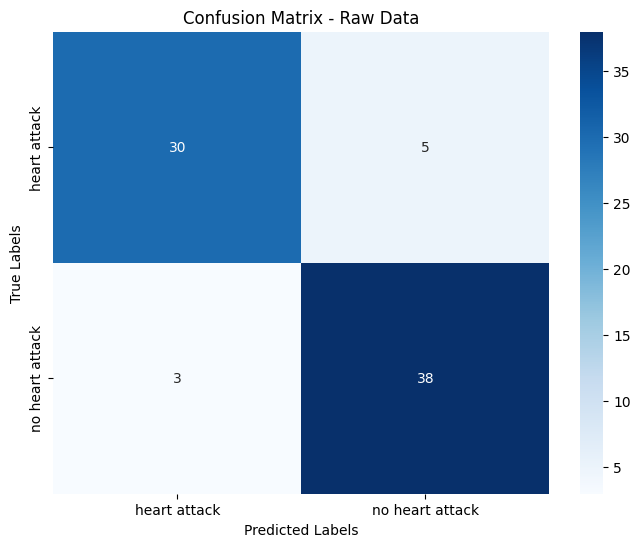

({'dt__max_depth': 5, 'dt__min_samples_split': 4, 'final_estimator__C': 0.1, 'final_estimator__max_iter': 100, 'lr__logisticregression__C': 1, 'svm__svc__C': 10, 'svm__svc__degree': 3, 'svm__svc__kernel': 'poly'}, 0.8148792270531402)


In [ ]:
df_heart_o2Saturation_dataset = pd.read_csv('/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv')
df_heart_attack_dataset = pd.read_csv('/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv')
x = df_heart_attack_dataset.values[:,:-2]
y = df_heart_attack_dataset.values[:,-1:]
print("feature dataset",x.shape)
print("target dataset",y.shape)

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import VotingClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)
print("training feature",X_train.shape)
print("test feature",X_test.shape)
print("training target",y_train.shape)
print("test target",y_test.shape)

param_grid = {
    'svm__svc__C': [0.1,1,10],
    'svm__svc__kernel': ['poly'],
    'svm__svc__degree': [2,3,5],
    'dt__min_samples_split': [3,4,5],
    'dt__max_depth': [5,10],
    'lr__logisticregression__C': [0.1,1],
    'final_estimator__C': [0.01,0.1,1],
    'final_estimator__max_iter': [100,200]
}

ensemble = VotingClassifier(
    estimators=[
        ('svm', SVC(probability=True, kernel='linear')),
        ('dt', DecisionTreeClassifier()),
        ('lr', make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000)))
    ],
    voting='soft',
    weights=[2, 1, 1]  # 模型銓重設定
)

grid_search = GridSearchCV(estimator=stacking_ensemble, param_grid=param_grid, cv=5, verbose=3, scoring='accuracy')
grid_search.fit(X_train, y_train.ravel())
y_pred_raw = grid_search.predict(X_test)

accuracy_raw = accuracy_score(y_test, y_pred_raw)
cm_raw = confusion_matrix(y_test, y_pred_raw)

# 正規化
#scaler_minmax = MinMaxScaler()

#X_train_minmax = scaler_minmax.fit_transform(X_train)
#X_test_minmax = scaler_minmax.transform(X_test)

# 準確率
score = grid_search.score(X_train,y_train)
print("training set accuracy %.1f" % (score * 100),"%")
score = grid_search.score(X_test,y_test)
print("test set accuracy %.1f" % (score * 100),"%")
#print(f"Accuracy with normalized data (Min-Max): {accuracy_minmax:.2f}")
#print(f"Accuracy with standardized data (Z-Score): {accuracy_standard:.2f}")

plt.figure(figsize=(8, 6))
sns.heatmap(cm_raw, annot=True, fmt="d", cmap="Blues", xticklabels=['heart attack','no heart attack'], yticklabels=['heart attack','no heart attack'])
plt.title('Confusion Matrix - Raw Data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

best_parameters = grid_search.best_params_
best_score = grid_search.best_score_

print((best_parameters, best_score))

# StackingClassifier with GridSearch

feature dataset (303, 12)
target dataset (303, 1)
training feature (227, 12)
test feature (76, 12)
training target (227, 1)
test target (76, 1)
Fitting 5 folds for each of 648 candidates, totalling 3240 fits
[CV 1/5] END dt__max_depth=5, dt__min_samples_split=3, final_estimator__C=0.01, final_estimator__max_iter=100, lr__logisticregression__C=0.1, svm__svc__C=0.1, svm__svc__degree=2, svm__svc__kernel=poly;, score=0.543 total time=   0.1s
[CV 2/5] END dt__max_depth=5, dt__min_samples_split=3, final_estimator__C=0.01, final_estimator__max_iter=100, lr__logisticregression__C=0.1, svm__svc__C=0.1, svm__svc__degree=2, svm__svc__kernel=poly;, score=0.543 total time=   0.2s
[CV 3/5] END dt__max_depth=5, dt__min_samples_split=3, final_estimator__C=0.01, final_estimator__max_iter=100, lr__logisticregression__C=0.1, svm__svc__C=0.1, svm__svc__degree=2, svm__svc__kernel=poly;, score=0.556 total time=   0.1s
[CV 4/5] END dt__max_depth=5, dt__min_samples_split=3, final_estimator__C=0.01, final_esti

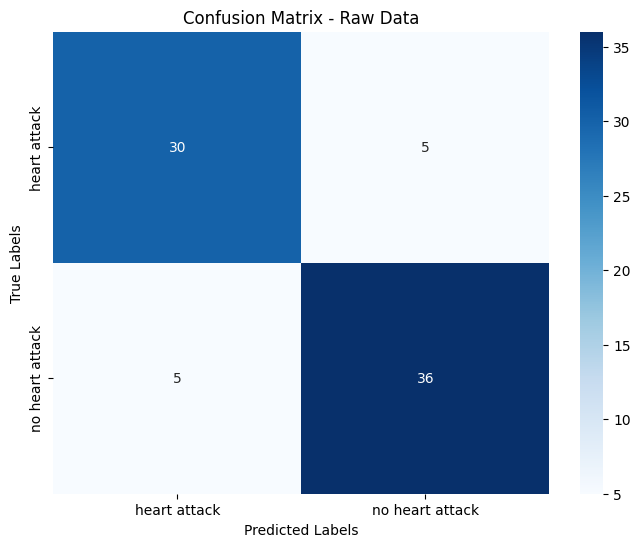

({'dt__max_depth': 5, 'dt__min_samples_split': 3, 'final_estimator__C': 1, 'final_estimator__max_iter': 200, 'lr__logisticregression__C': 1, 'svm__svc__C': 1, 'svm__svc__degree': 2, 'svm__svc__kernel': 'poly'}, 0.8146859903381642)


In [ ]:
df_heart_o2Saturation_dataset = pd.read_csv('/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv')
df_heart_attack_dataset = pd.read_csv('/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv')
x = df_heart_attack_dataset.values[:,:-2]
y = df_heart_attack_dataset.values[:,-1:]
print("feature dataset",x.shape)
print("target dataset",y.shape)

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import StackingClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)
print("training feature",X_train.shape)
print("test feature",X_test.shape)
print("training target",y_train.shape)
print("test target",y_test.shape)

param_grid = {
    'svm__svc__C': [0.1,1,10],
    'svm__svc__kernel': ['poly'],
    'svm__svc__degree': [2,3,5],
    'dt__min_samples_split': [3,4,5],
    'dt__max_depth': [5,10],
    'lr__logisticregression__C': [0.1,1],
    'final_estimator__C': [0.01,0.1,1],
    'final_estimator__max_iter': [100,200]
}

estimators = [
    ('svm', make_pipeline(StandardScaler(), SVC(probability=True, kernel='linear'))),
    ('dt', DecisionTreeClassifier()),
    ('lr', make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000)))
]

# Stacking模型
stacking_ensemble = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(),
    cv=5,
    stack_method='auto',
    passthrough=False
)

grid_search = GridSearchCV(estimator=stacking_ensemble, param_grid=param_grid, cv=5, verbose=3, scoring='accuracy')
grid_search.fit(X_train, y_train.ravel())
y_pred_raw = grid_search.predict(X_test)

accuracy_raw = accuracy_score(y_test, y_pred_raw)
cm_raw = confusion_matrix(y_test, y_pred_raw)

# 正規化
#scaler_minmax = MinMaxScaler()

#X_train_minmax = scaler_minmax.fit_transform(X_train)
#X_test_minmax = scaler_minmax.transform(X_test)

# 準確率
score = grid_search.score(X_train,y_train)
print("training set accuracy %.1f" % (score * 100),"%")
score = grid_search.score(X_test,y_test)
print("test set accuracy %.1f" % (score * 100),"%")
#print(f"Accuracy with normalized data (Min-Max): {accuracy_minmax:.2f}")
#print(f"Accuracy with standardized data (Z-Score): {accuracy_standard:.2f}")

plt.figure(figsize=(8, 6))
sns.heatmap(cm_raw, annot=True, fmt="d", cmap="Blues", xticklabels=['heart attack','no heart attack'], yticklabels=['heart attack','no heart attack'])
plt.title('Confusion Matrix - Raw Data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

best_parameters = grid_search.best_params_
best_score = grid_search.best_score_

print((best_parameters, best_score))